## Running topGO

In [1]:
require("topGO")
library(genefilter)
setwd("/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/")

Loading required package: topGO
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: graph
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contai


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



Attaching package: ‘topGO’

The following object is masked from ‘package:IRanges’:

    members


Attaching package: ‘genefilter’

The following object is masked from ‘package:base’:

    anyNA



In [2]:
# load in the deseq results
load("out/res_rag_wt")

In [3]:
# load in protein cluster ID -> GO terms mapping
geneID2GO <- readMappings("out/geneid2go.map")
head(geneID2GO)

$`22855681`
[1] "GO:0006090" "GO:0016301" "GO:0003824" "GO:0016310" "GO:0016772"
[6] "GO:0050242" "GO:0005524"

$`49973931`
[1] "GO:0050485" "GO:0055114"

$`61502806`
[1] "GO:0005509" "GO:0005783" "GO:0005515" "GO:0051082" "GO:0006457"

$`17629190`
[1] "GO:0006090" "GO:0016301" "GO:0003824" "GO:0016310" "GO:0016772"
[6] "GO:0050242" "GO:0005524"

$`27803655`
[1] "GO:0016616" "GO:0016491" "GO:0006631" "GO:0055114" "GO:0003857"
[6] "GO:0070403" "GO:0050662"

$`52783963`
[1] "GO:0016620" "GO:0055114"

In [4]:
# load in the count data
load("out/dds_RTcontrol")
# filter out genes with low expression value as well as with very small variability across samples.
selProt <- genefilter(counts(dds), filterfun(kOverA(3, 6), function(x) (IQR(x) > 0.25)))
sum(selProt)
dim(counts(dds))
res=res[selProt,]

[1] 4615

[1] 5610    9

## human_mouse proteins only

In [5]:
# human_mouse proteins only
res_hm = res[res$human_mouse=="True",]

geneList = res_hm$padj
names(geneList)<-rownames(res_hm)

In [6]:
# Tests based on gene counts
# universe is all proteins observed
# "sig" proteins are ones with a (adjusted) p-value < 0.01
topDiffGenes <- function(allScore) { return(allScore < 0.01)}
GOdata <- new("topGOdata", ontology = "BP", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01 <- runTest(GOdata, statistic = "fisher")
# "sig" proteins are determined by rank
resultWeight01ks <- runTest(GOdata, statistic = "ks")


Building most specific GOs .....	( 50 GO terms found. )

Build GO DAG topology ..........	( 292 GO terms and 557 relations. )

Annotating nodes ...............	( 73 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 16 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 7:	1 nodes to be scored	(0 eliminated genes)

	 Level 6:	2 nodes to be scored	(0 eliminated genes)

	 Level 5:	2 nodes to be scored	(2 eliminated genes)

	 Level 4:	3 nodes to be scored	(25 eliminated genes)

	 Level 3:	4 nodes to be scored	(39 eliminated genes)

	 Level 2:	3 nodes to be scored	(49 eliminated genes)

	 Level 1:	1 nodes to be scored	(57 eliminated genes)

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 292 nontrivial nodes
		 parameters: 
			 test statistic:  ks 
			 score order:  increasing 

	 Level 13:	1 nodes to be scored	(0 eliminated genes)

	 Level 12:	4 nodes to be scored	(0 eliminated genes)

	 Level 11:	12 nodes to be sc

In [7]:
GenTable(GOdata, resultWeight01, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0005975,carbohydrate metabolic process,9,2,0.49,0.072
GO:0015671,oxygen transport,2,1,0.11,0.107
GO:0006508,proteolysis,23,1,1.26,0.788
GO:0015669,gas transport,2,1,0.11,1.000
GO:0019538,protein metabolic process,25,1,1.37,1.000
GO:0006810,transport,15,1,0.82,1.000
GO:0043170,macromolecule metabolic process,26,1,1.42,1.000
GO:0044699,single-organism process,34,1,1.86,1.000
GO:0044765,single-organism transport,14,1,0.77,1.000
GO:0051234,establishment of localization,15,1,0.82,1.000


In [8]:
GenTable(GOdata, resultWeight01ks, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0006813,potassium ion transport,2,0,0.11,0.047
GO:0006814,sodium ion transport,2,0,0.11,0.047
GO:0005975,carbohydrate metabolic process,9,2,0.49,0.135
GO:0006810,transport,15,1,0.82,0.171
GO:0006508,proteolysis,23,1,1.26,0.174
GO:0015671,oxygen transport,2,1,0.11,0.195
GO:0006955,immune response,4,0,0.22,0.271
GO:0007264,small GTPase mediated signal transductio...,1,0,0.05,0.290
GO:0006006,glucose metabolic process,2,0,0.11,0.368
GO:0007156,homophilic cell adhesion via plasma memb...,2,0,0.11,0.389


In [9]:
# same thing using GO MF
GOdataMF <- new("topGOdata", ontology = "MF", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01MF <- runTest(GOdataMF, statistic = "fisher")
resultWeight01ksMF <- runTest(GOdataMF, statistic = "ks")


Building most specific GOs .....	( 82 GO terms found. )

Build GO DAG topology ..........	( 205 GO terms and 267 relations. )

Annotating nodes ...............	( 101 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 21 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 7:	2 nodes to be scored	(0 eliminated genes)

	 Level 6:	3 nodes to be scored	(0 eliminated genes)

	 Level 5:	3 nodes to be scored	(17 eliminated genes)

	 Level 4:	4 nodes to be scored	(32 eliminated genes)

	 Level 3:	6 nodes to be scored	(48 eliminated genes)

	 Level 2:	2 nodes to be scored	(51 eliminated genes)

	 Level 1:	1 nodes to be scored	(77 eliminated genes)

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 205 nontrivial nodes
		 parameters: 
			 test statistic:  ks 
			 score order:  increasing 

	 Level 14:	1 nodes to be scored	(0 eliminated genes)

	 Level 13:	2 nodes to be scored	(0 eliminated genes)

	 Level 12:	1 nodes to be s

In [10]:
GenTable(GOdataMF, resultWeight01MF, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0043169,cation binding,36,3,2.85,0.026
GO:0005515,protein binding,21,4,1.66,0.056
GO:0019825,oxygen binding,2,1,0.16,0.153
GO:0020037,heme binding,3,1,0.24,0.221
GO:0005506,iron ion binding,7,1,0.55,0.449
GO:0004252,serine-type endopeptidase activity,10,1,0.79,0.579
GO:0003824,catalytic activity,55,3,4.36,0.667
GO:0003674,molecular_function,101,8,8.00,1.000
GO:0008233,peptidase activity,25,1,1.98,1.000
GO:0004175,endopeptidase activity,12,1,0.95,1.000


In [11]:
GenTable(GOdataMF, resultWeight01ksMF, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0016787,hydrolase activity,36,1,2.85,0.016
GO:0043169,cation binding,36,3,2.85,0.038
GO:0030145,manganese ion binding,2,0,0.16,0.064
GO:0005515,protein binding,21,4,1.66,0.148
GO:0003676,nucleic acid binding,4,0,0.32,0.163
GO:0004181,metallocarboxypeptidase activity,2,0,0.16,0.166
GO:0005215,transporter activity,4,0,0.32,0.189
GO:0003824,catalytic activity,55,3,4.36,0.200
GO:0008235,metalloexopeptidase activity,4,0,0.32,0.212
GO:0004867,serine-type endopeptidase inhibitor acti...,3,0,0.24,0.215


## Non -human/mouse

In [12]:
res_nh = res[res$human_mouse=="False",]

geneList = res_nh$padj
names(geneList)<-rownames(res_nh)
length(geneList)

[1] 4463

In [13]:
GOdataBP <- new("topGOdata", ontology = "BP", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01BP <- runTest(GOdataBP, statistic = "fisher")
resultWeight01ksBP <- runTest(GOdataBP, statistic = "ks")


Building most specific GOs .....	( 170 GO terms found. )

Build GO DAG topology ..........	( 546 GO terms and 1107 relations. )

Annotating nodes ...............	( 3558 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 226 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 13:	1 nodes to be scored	(0 eliminated genes)

	 Level 12:	2 nodes to be scored	(0 eliminated genes)

	 Level 11:	6 nodes to be scored	(259 eliminated genes)

	 Level 10:	14 nodes to be scored	(262 eliminated genes)

	 Level 9:	23 nodes to be scored	(381 eliminated genes)

	 Level 8:	23 nodes to be scored	(904 eliminated genes)

	 Level 7:	21 nodes to be scored	(1398 eliminated genes)

	 Level 6:	37 nodes to be scored	(2317 eliminated genes)

	 Level 5:	44 nodes to be scored	(2437 eliminated genes)

	 Level 4:	29 nodes to be scored	(2571 eliminated genes)

	 Level 3:	17 nodes to be scored	(2663 eliminated genes)

	 Level 2:	8 nodes to be scored	(3348 e

In [14]:
GenTable(GOdataBP, resultWeight01BP, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0071973,bacterial-type flagellum-dependent cell ...,238,32,9.03,8.0e-11
GO:0006633,fatty acid biosynthetic process,14,6,0.53,6.2e-06
GO:0032784,regulation of DNA-templated transcriptio...,3,3,0.11,5.3e-05
GO:0006629,lipid metabolic process,61,8,2.31,0.0013
GO:0035556,intracellular signal transduction,4,3,0.15,0.0014
GO:0006084,acetyl-CoA metabolic process,9,3,0.34,0.0038
GO:0006066,alcohol metabolic process,20,4,0.76,0.0080
GO:0015976,carbon utilization,4,2,0.15,0.0082
GO:0006096,glycolytic process,259,16,9.83,0.0341
GO:0006284,base-excision repair,1,1,0.04,0.0379


In [15]:
GenTable(GOdataBP, resultWeight01ksBP, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0006090,pyruvate metabolic process,551,24,20.91,< 1e-30
GO:0016310,phosphorylation,585,24,22.20,< 1e-30
GO:0071973,bacterial-type flagellum-dependent cell ...,238,32,9.03,7.4e-14
GO:0006102,isocitrate metabolic process,20,0,0.76,2.3e-11
GO:0006351,"transcription, DNA-templated",350,5,13.28,1.6e-08
GO:0006810,transport,243,5,9.22,8.8e-08
GO:0006164,purine nucleotide biosynthetic process,124,1,4.70,4.8e-05
GO:0009396,folic acid-containing compound biosynthe...,20,2,0.76,0.00013
GO:0017038,protein import,21,0,0.80,0.00016
GO:0006633,fatty acid biosynthetic process,14,6,0.53,0.00056


In [16]:
# Molecular function
GOdataMF <- new("topGOdata", ontology = "MF", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01MF <- runTest(GOdataMF, statistic = "fisher")
resultWeight01ksMF <- runTest(GOdataMF, statistic = "ks")


Building most specific GOs .....	( 280 GO terms found. )

Build GO DAG topology ..........	( 447 GO terms and 535 relations. )

Annotating nodes ...............	( 3889 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 160 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 9:	2 nodes to be scored	(0 eliminated genes)

	 Level 8:	7 nodes to be scored	(0 eliminated genes)

	 Level 7:	19 nodes to be scored	(971 eliminated genes)

	 Level 6:	35 nodes to be scored	(977 eliminated genes)

	 Level 5:	41 nodes to be scored	(1632 eliminated genes)

	 Level 4:	30 nodes to be scored	(1996 eliminated genes)

	 Level 3:	19 nodes to be scored	(2890 eliminated genes)

	 Level 2:	6 nodes to be scored	(3022 eliminated genes)

	 Level 1:	1 nodes to be scored	(3515 eliminated genes)

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 447 nontrivial nodes
		 parameters: 
			 test statistic:  ks 
			 score order:  increasing 

	 Level

In [17]:
GenTable(GOdataMF, resultWeight01MF, topNodes=10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0004634,phosphopyruvate hydratase activity,36,13,1.35,1.9e-10
GO:0005198,structural molecule activity,535,36,20.08,2.9e-10
GO:0004315,3-oxoacyl-[acyl-carrier-protein] synthas...,7,6,0.26,1.7e-08
GO:0000287,magnesium ion binding,90,15,3.38,8.2e-07
GO:0008762,UDP-N-acetylmuramate dehydrogenase activ...,2,2,0.08,0.0014
GO:0004435,phosphatidylinositol phospholipase C act...,2,2,0.08,0.0014
GO:0004022,alcohol dehydrogenase (NAD) activity,6,3,0.23,0.0079
GO:0008774,acetaldehyde dehydrogenase (acetylating)...,4,2,0.15,0.0080
GO:0018492,carbon-monoxide dehydrogenase (acceptor)...,16,3,0.60,0.0203
GO:0004853,uroporphyrinogen decarboxylase activity,1,1,0.04,0.0375


In [18]:
GenTable(GOdataMF, resultWeight01ksMF, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0050242,"pyruvate, phosphate dikinase activity",286,8,10.74,< 1e-30
GO:0016301,kinase activity,407,6,15.28,< 1e-30
GO:0016887,ATPase activity,166,5,6.23,2.4e-15
GO:0005198,structural molecule activity,535,36,20.08,9.9e-14
GO:0004450,isocitrate dehydrogenase (NADP+) activit...,20,0,0.75,1.3e-11
GO:0003677,DNA binding,349,5,13.10,1.2e-10
GO:0005524,ATP binding,756,7,28.38,1.8e-10
GO:0003899,DNA-directed RNA polymerase activity,338,2,12.69,1.4e-09
GO:0016820,"hydrolase activity, acting on acid anhyd...",138,2,5.18,3.2e-08
GO:0004315,3-oxoacyl-[acyl-carrier-protein] synthas...,7,6,0.26,3.5e-06


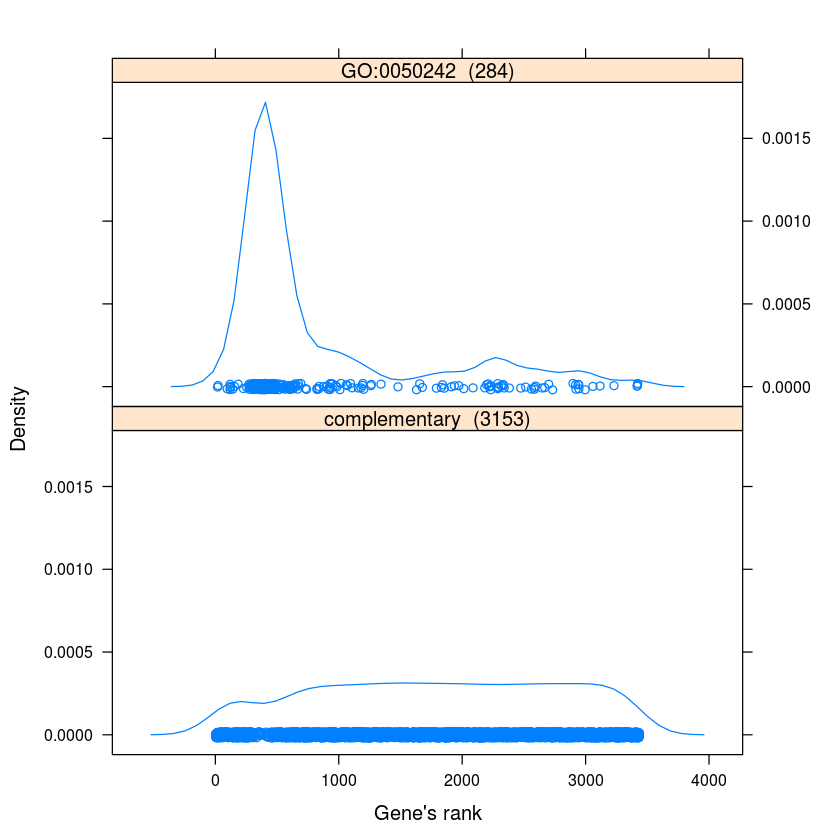

In [19]:
print(showGroupDensity(GOdataMF, "GO:0050242", ranks = TRUE))